In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

import cartopy
import cartopy.crs as ccrs

In [2]:
files = sorted(os.listdir('tables'))

dfs = []
dfs_dict = {}
for file in files:
    df=pd.read_csv(f'tables/{file}',parse_dates=['dt'],index_col=0)
    dfs.append(df)
df=pd.concat(dfs)
df

,year,month,day,hour,latitude,longitude,wind_dir_deg,wind_spd_m_s,dt,delta_t_hrs,...,dx,dy,dist,station_speed_m_s,dlon,dlat,station_dir_deg,dist2,dir_stat_wind,station
1,1937,5,22,12,89.456,-69.297,265.0,7.0,1937-05-22 12:00:00,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1937,5,22,18,89.448,-67.343,265.0,7.0,1937-05-22 18:00:00,6.0,...,-58.847497,-2259.654575,2260.420719,0.104649,1.954,-0.008,294.149216,2270.465612,29.149216,1
3,1937,5,23,0,89.438,-65.450,285.0,5.0,1937-05-23 00:00:00,6.0,...,-199.471647,-2320.252432,2328.810916,0.107815,1.893,-0.010,299.464133,2339.163012,14.464133,1
4,1937,5,23,6,89.429,-63.621,330.0,6.0,1937-05-23 06:00:00,6.0,...,-38.887265,-2245.696046,2246.032714,0.103983,1.829,-0.009,297.371554,2256.014725,-32.628446,1
5,1937,5,23,12,89.418,-61.856,330.0,6.0,1937-05-23 12:00:00,6.0,...,-182.660247,-2315.578367,2322.771608,0.107536,1.765,-0.011,302.654922,2333.098545,-27.345078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,1961,3,19,3,86.592,-179.727,230.0,6.0,1961-03-19 03:00:00,3.0,...,-467.967610,-446.542243,646.833564,0.059892,0.071,0.004,226.590379,649.682561,-3.409621,9
2578,1961,3,19,6,86.595,-179.656,230.0,5.0,1961-03-19 06:00:00,3.0,...,-467.530301,-335.971463,575.726851,0.053308,0.071,0.003,234.619305,578.194572,4.619305,9
2579,1961,3,19,9,86.598,-179.584,230.0,5.0,1961-03-19 09:00:00,3.0,...,-473.301828,-336.595957,580.785209,0.053776,0.072,0.003,234.973683,583.271867,4.973683,9
2580,1961,3,19,12,86.601,-179.512,230.0,6.0,1961-03-19 12:00:00,3.0,...,-472.459461,-337.187413,580.442326,0.053745,0.072,0.003,234.949948,582.927886,4.949948,9


/tmp/ipykernel_22489/4157608394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['speed_ratio']=np.divide(np.array(dfw['station_speed_m_s']),


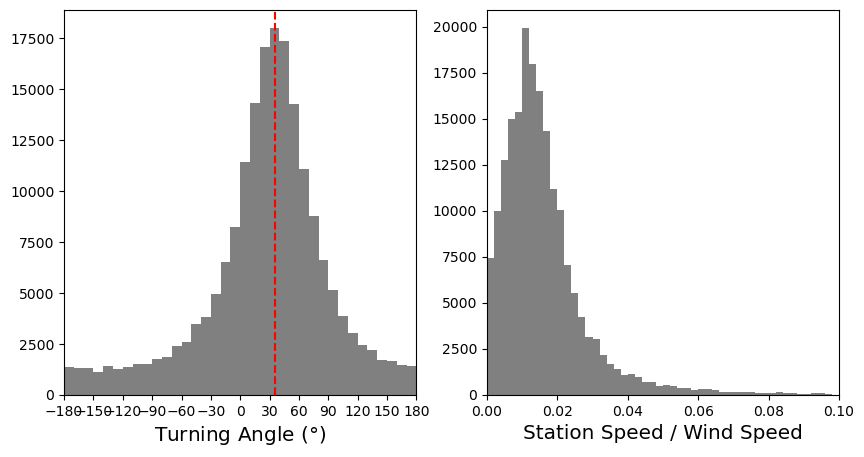

In [3]:
df.dropna(inplace=True)

dfw = df[df['wind_spd_m_s']>=1]

dfw['speed_ratio']=np.divide(np.array(dfw['station_speed_m_s']),
                            np.array(dfw['wind_spd_m_s']))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(dfw['dir_stat_wind'],bins=np.arange(-180,181,10),color='grey')
ax1.set_xlabel('Turning Angle ($\degree$)',fontsize='x-large')
ax1.set_xlim(-180,180)
ax1.set_xticks(np.arange(-180,181,30))
ax1.axvline(36,color='r',linestyle='--')

ax2.set_xlabel('Station Speed / Wind Speed',fontsize='x-large')

ax2.hist(dfw['speed_ratio'],bins=np.arange(0,0.1,0.002),color='grey')
ax2.set_xlim(0,0.1)

plt.savefig('figures/Raw_Histograms.png',dpi=500,bbox_inches='tight')

plt.show()


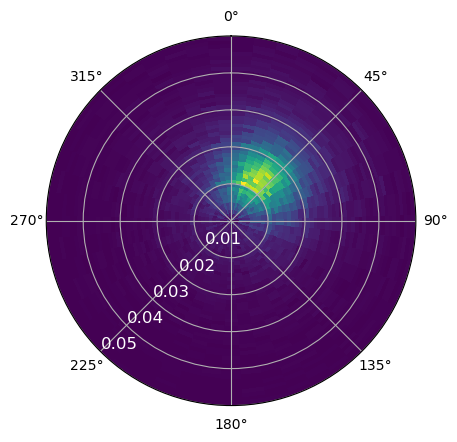

In [7]:
r_edges = np.linspace(0,0.05,50)
theta_edges = np.linspace(0, 2*np.pi, 50)

hist = np.radians(dfw['dir_stat_wind'])
hist%=2*np.pi

H, _, _ = np.histogram2d(dfw['speed_ratio'],
                         hist,
                         [r_edges, theta_edges])

ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2.0)
Theta, R = np.meshgrid(theta_edges, r_edges)
ax.pcolormesh(Theta, R, H)

ax.set_rgrids(np.arange(0.01,0.051, 0.01),
              labels=np.arange(0.01,0.051, 0.01),
              fontsize=12,
              angle=225,color='white')

plt.savefig('figures/Polar.png',dpi=500,bbox_inches='tight')

plt.show()

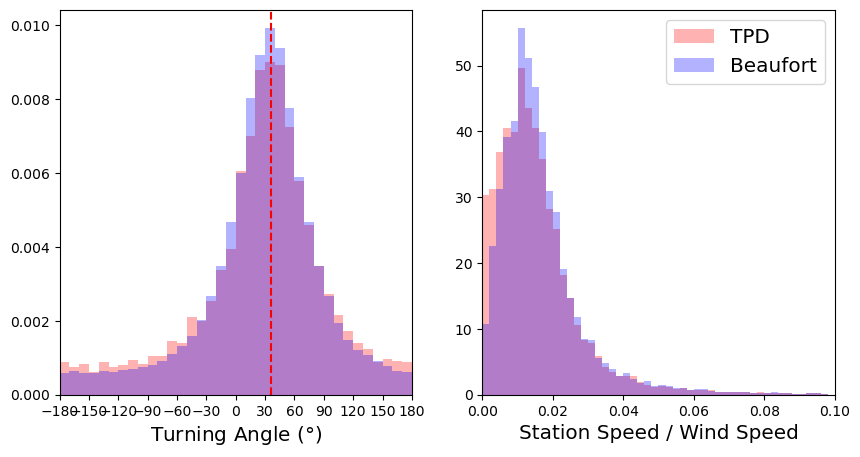

In [6]:
df_bea = dfw[3*dfw['x']-dfw['y']+0.5e6<0]
df_tpd = dfw[3*dfw['x']-dfw['y']+0.5e6>0]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(df_bea['dir_stat_wind'],bins=np.arange(-180,181,10),color='r',alpha=0.3,density=True)
ax1.hist(df_tpd['dir_stat_wind'],bins=np.arange(-180,181,10),color='b',alpha=0.3,density=True)

ax1.set_xlabel('Turning Angle ($\degree$)',fontsize='x-large')
ax1.set_xlim(-180,180)
ax1.set_xticks(np.arange(-180,181,30))
ax1.axvline(36,color='r',linestyle='--')

ax2.set_xlabel('Station Speed / Wind Speed',fontsize='x-large')

ax2.hist(df_bea['speed_ratio'],bins=np.arange(0,0.1,0.002),color='r',alpha=0.3,density=True,label='TPD')
ax2.hist(df_tpd['speed_ratio'],bins=np.arange(0,0.1,0.002),color='b',alpha=0.3,density=True,label='Beaufort')
ax2.set_xlim(0,0.1)
ax2.legend(fontsize='x-large')

plt.savefig('figures/Beaufort_vs_TPD.png',dpi=500,bbox_inches='tight')

plt.show()

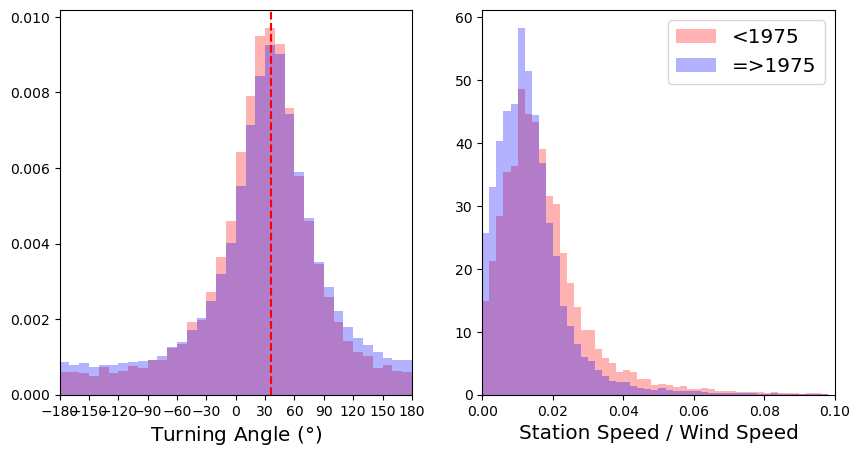

In [26]:
key_year  = 1975

df_early = dfw[dfw['year']<key_year]
df_late = dfw[dfw['year']>=key_year]
              
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(df_early['dir_stat_wind'],bins=np.arange(-180,181,10),color='r',alpha=0.3,density=True)
ax1.hist(df_late['dir_stat_wind'],bins=np.arange(-180,181,10),color='b',alpha=0.3,density=True)

ax1.set_xlabel('Turning Angle ($\degree$)',fontsize='x-large')
ax1.set_xlim(-180,180)
ax1.set_xticks(np.arange(-180,181,30))
ax1.axvline(36,color='r',linestyle='--')

ax2.set_xlabel('Station Speed / Wind Speed',fontsize='x-large')

ax2.hist(df_early['speed_ratio'],bins=np.arange(0,0.1,0.002),color='r',alpha=0.3,density=True,label=f'<{key_year}')
ax2.hist(df_late['speed_ratio'],bins=np.arange(0,0.1,0.002),color='b',alpha=0.3,density=True,label=f'=>{key_year}')
ax2.set_xlim(0,0.1)
ax2.legend(fontsize='x-large')

plt.savefig('figures/1975_Breakpoint.png',dpi=500,bbox_inches='tight')

plt.show()

0.015223162977551826 0.018462454966214212
22.082023548636375 31.997870952993363


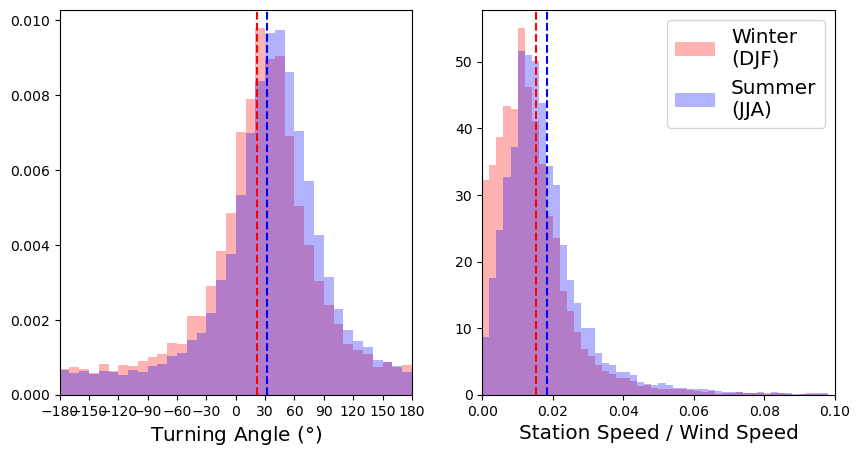

In [25]:
summer_months = [6,7,8,]
winter_months = [12,1,2]

df_sum = dfw[np.isin(dfw['month'],summer_months)]
df_win = dfw[np.isin(dfw['month'],winter_months)]
              
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(df_win['dir_stat_wind'],bins=np.arange(-180,181,10),color='r',alpha=0.3,density=True)
ax1.hist(df_sum['dir_stat_wind'],bins=np.arange(-180,181,10),color='b',alpha=0.3,density=True)

ax1.set_xlabel('Turning Angle ($\degree$)',fontsize='x-large')
ax1.set_xlim(-180,180)
ax1.set_xticks(np.arange(-180,181,30))

ax1.axvline(np.nanmean(df_win['dir_stat_wind']),color='r',linestyle='--')
ax1.axvline(np.nanmean(df_sum['dir_stat_wind']),color='b',linestyle='--')

ax2.set_xlabel('Station Speed / Wind Speed',fontsize='x-large')

ax2.hist(df_win['speed_ratio'],bins=np.arange(0,0.1,0.002),color='r',alpha=0.3,density=True,label=f'Winter\n(DJF)')
ax2.hist(df_sum['speed_ratio'],bins=np.arange(0,0.1,0.002),color='b',alpha=0.3,density=True,label=f'Summer\n(JJA)')

print(np.nanmean(df_win['speed_ratio']),np.nanmean(df_sum['speed_ratio']))
print(np.nanmean(df_win['dir_stat_wind']),np.nanmean(df_sum['dir_stat_wind']))

ax2.axvline(np.nanmean(df_win['speed_ratio']),color='r',linestyle='--')
ax2.axvline(np.nanmean(df_sum['speed_ratio']),color='b',linestyle='--')

ax2.set_xlim(0,0.1)
ax2.legend(fontsize='x-large')

plt.savefig('figures/Winter_vs_Summer.png',dpi=500,bbox_inches='tight')

plt.show()

0.016352972619742365 0.018646434943410062
22.442043988751617 33.66798236230919


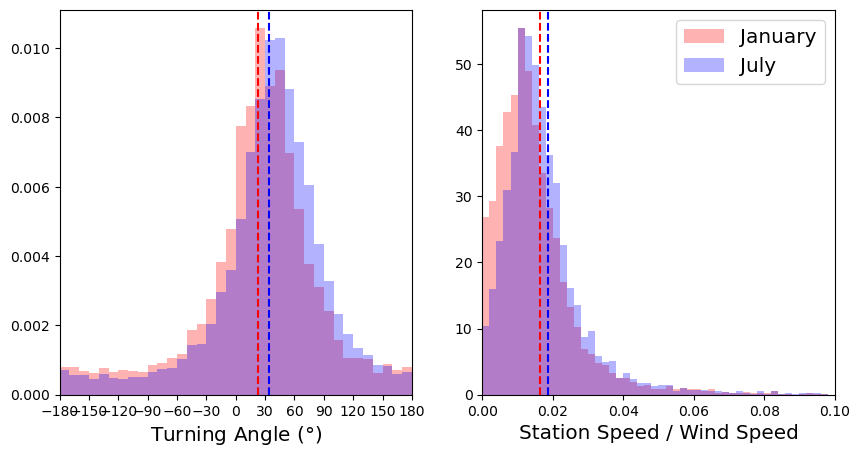

In [24]:
summer_months = [7]
winter_months = [1]


df_sum = dfw[np.isin(dfw['month'],summer_months)]
df_win = dfw[np.isin(dfw['month'],winter_months)]
              
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(df_win['dir_stat_wind'],bins=np.arange(-180,181,10),color='r',alpha=0.3,density=True)
ax1.hist(df_sum['dir_stat_wind'],bins=np.arange(-180,181,10),color='b',alpha=0.3,density=True)

ax1.set_xlabel('Turning Angle ($\degree$)',fontsize='x-large')
ax1.set_xlim(-180,180)
ax1.set_xticks(np.arange(-180,181,30))

ax1.axvline(np.nanmean(df_win['dir_stat_wind']),color='r',linestyle='--')
ax1.axvline(np.nanmean(df_sum['dir_stat_wind']),color='b',linestyle='--')

ax2.set_xlabel('Station Speed / Wind Speed',fontsize='x-large')

ax2.hist(df_win['speed_ratio'],bins=np.arange(0,0.1,0.002),color='r',alpha=0.3,density=True,label=f'January')
ax2.hist(df_sum['speed_ratio'],bins=np.arange(0,0.1,0.002),color='b',alpha=0.3,density=True,label=f'July')

print(np.nanmean(df_win['speed_ratio']),np.nanmean(df_sum['speed_ratio']))
print(np.nanmean(df_win['dir_stat_wind']),np.nanmean(df_sum['dir_stat_wind']))

ax2.axvline(np.nanmean(df_win['speed_ratio']),color='r',linestyle='--')
ax2.axvline(np.nanmean(df_sum['speed_ratio']),color='b',linestyle='--')

ax2.set_xlim(0,0.1)
ax2.legend(fontsize='x-large')

plt.savefig('figures/Jan_vs_July.png',dpi=500,bbox_inches='tight')

plt.show()

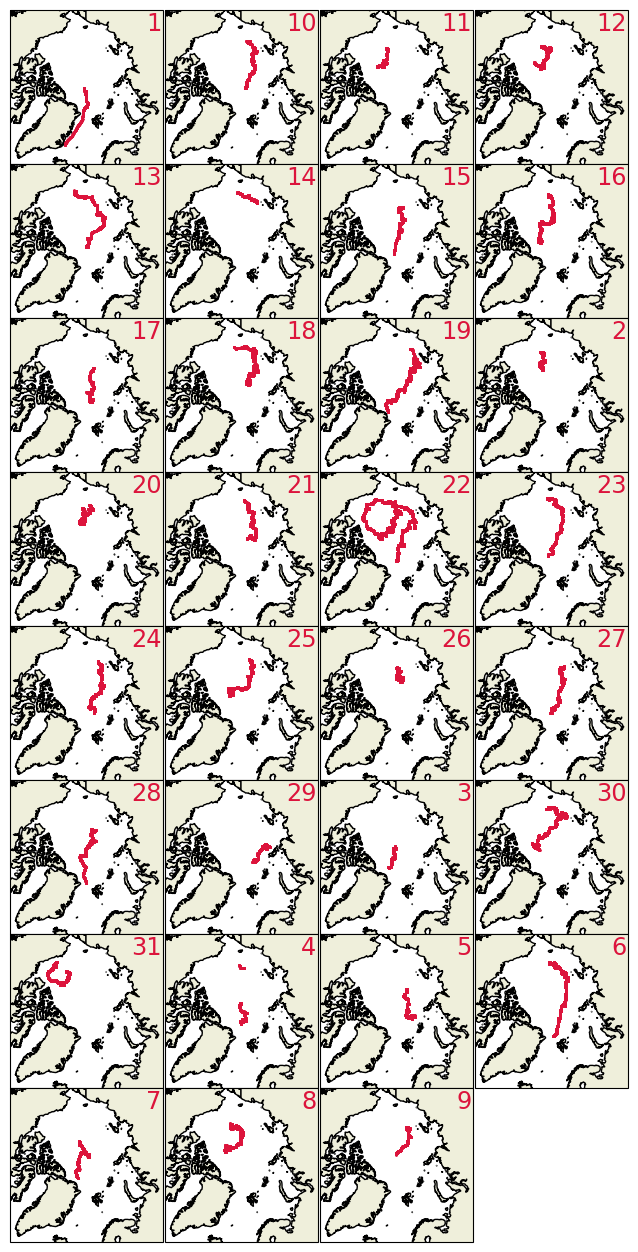

In [22]:
figs,axs=plt.subplots(8,4,figsize=(8,16),subplot_kw={'projection':ccrs.NorthPolarStereo()})


for ax, df in zip(axs.reshape(-1),dfs):
    
    station = df.iloc[0]['station']

    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    ax.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())

    m = ax.scatter(df['longitude'],
                      df['latitude'],
                     transform=ccrs.PlateCarree(),
                     label=station,
                     s=1,color='crimson')
    
    ax.annotate(str(station),xy=(0.99,0.99),ha='right',va='top',
                xycoords='axes fraction',fontsize='xx-large',color='crimson')
    
axs.reshape(-1)[-1].remove()

plt.subplots_adjust(wspace=0,hspace=0)

plt.savefig('figures/trajectories.png',dpi=500,bbox_inches='tight')

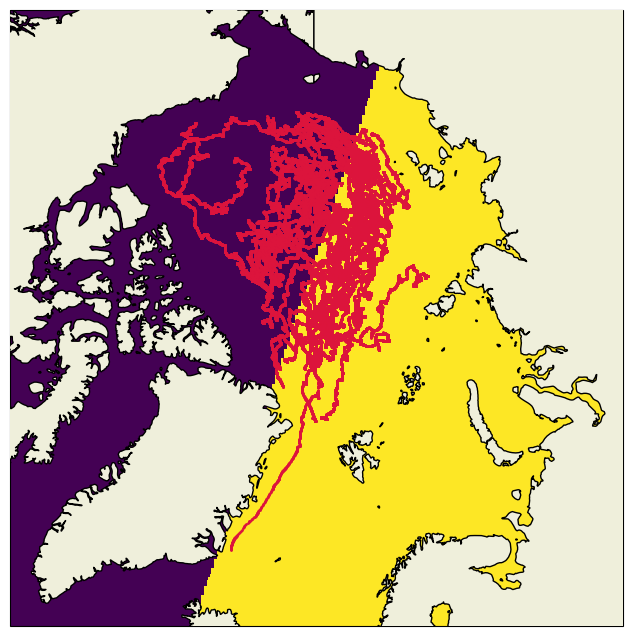

In [23]:
figs,ax=plt.subplots(1,1,figsize=(8,8),subplot_kw={'projection':ccrs.NorthPolarStereo()})


ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=5)

ax.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())

mask_vals, lon, lat = pickle.load(open('Beaufort_mask/tpd_mask.p','rb'))

# for ax, (station,df) in zip(axs.reshape(-1),dfs.items()):
    
for df in dfs:

    m = ax.scatter(df['longitude'],
                      df['latitude'],
                     transform=ccrs.PlateCarree(),
                     s=1,color='crimson',zorder=10)

m = ax.pcolormesh(lon,
                  lat,
                   mask_vals,
                 transform=ccrs.PlateCarree(),
                 # label=station,
                 )


plt.savefig('figures/trajectories_on_mask.png',dpi=500,bbox_inches='tight')